In [38]:
from pandas_gbq import read_gbq
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 8), 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('white')
sns.set_palette(sns.color_palette('colorblind', 8))

In [2]:
projectid = 'jrb-gcp-personal'
private_key = '/home/jbandlow/Downloads/jrb-gcp-personal-9e21aa7b9578.json'
configuration = {
   'query': {
     'useLegacySql': False
   }
}

In [28]:
query = r'''
select 
    timestamp,
    title,
    score,
    url,
    descendants,
    id,
    `by`
from `bigquery-public-data.hacker_news.full` 
where 
  type = 'story' and 
  (
     regexp_contains(lower(title), r'[ \$]btc') or
     regexp_contains(lower(title), r'bitcoin') or
     regexp_contains(lower(title), r'bit coin')
  ) and
  descendants >= 5 and
  score >= 10
'''

In [29]:
df = read_gbq(query, projectid, private_key=private_key, configuration=configuration)

In [30]:
df.head()

,timestamp,title,score,url,descendants,id,by
0,2014-03-06 12:35:44,The Face Behind Bitcoin?,1165,http://mag.newsweek.com/2014/03/14/bitcoin-sat...,678,7353283,warrenmiller
1,2018-01-23 19:02:40,Ending Bitcoin Support,989,https://stripe.com/blog/ending-bitcoin-support,625,16216329,uptown
2,2013-04-01 14:17:19,Bitcoin exchange rate reached $100 USD per BTC,317,http://bitcoincharts.com/charts/mtgoxUSD,578,5473128,vitalique
3,2014-02-13 20:21:22,"Silk Road 2 Hacked, All Bitcoins Stolen",449,http://www.deepdotweb.com/2014/02/13/silk-road...,531,7234010,nikcub
4,2013-12-28 19:45:22,Bitcoin and positive vs. normative economics,201,http://krugman.blogs.nytimes.com/2013/12/28/bi...,506,6976095,the_economist


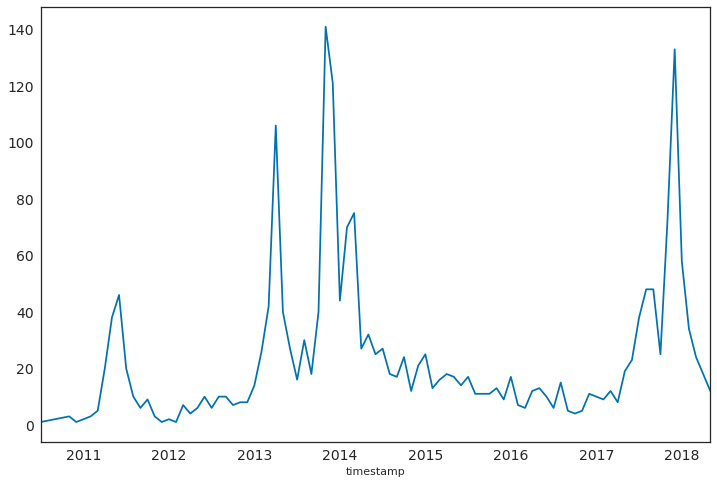

In [55]:
df.timestamp.groupby(df.timestamp.dt.to_period('M')).count().plot();

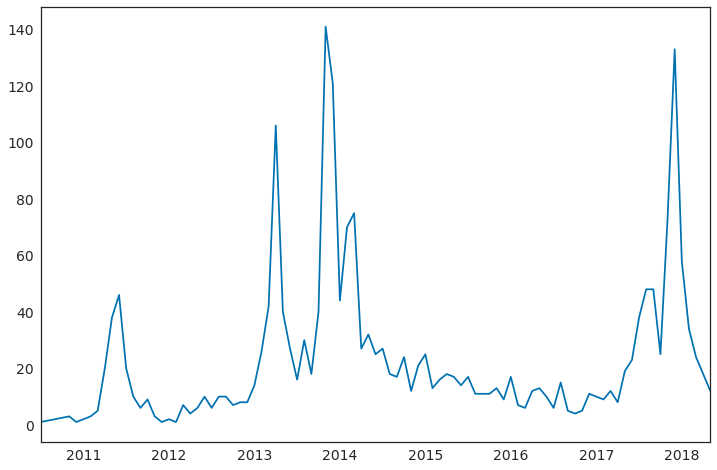

In [48]:
df.timestamp.apply(lambda _: _.to_period('M')).value_counts().sort_index().plot();

In [43]:
tmp.index

PeriodIndex(['2010-07', '2010-11', '2010-12', '2011-02', '2011-03', '2011-04',
             '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
             '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04',
             '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10',
             '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
             '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
             '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
             '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
             '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
             '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
             '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
             '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
             '2016-11', '2016-12', '2017-01', '2017-

In [44]:
tmp.values

array([  1,   3,   1,   3,   5,  20,  38,  46,  20,  10,   6,   9,   3,
         1,   2,   1,   7,   4,   6,  10,   6,  10,  10,   7,   8,   8,
        14,  26,  42, 106,  40,  27,  16,  30,  18,  40, 141, 121,  44,
        70,  75,  27,  32,  25,  27,  18,  17,  24,  12,  21,  25,  13,
        16,  18,  17,  14,  17,  11,  11,  11,  13,   9,  17,   7,   6,
        12,  13,  10,   6,  15,   5,   4,   5,  11,  10,   9,  12,   8,
        19,  23,  38,  48,  48,  25,  73, 133,  58,  34,  24,  18,  12])

In [19]:
df.loc[0, 'time_ts'].to_period('M')

Period('2014-03', 'M')

In [7]:
len(df)

1407

In [11]:
df.dead.value_counts()

True    12
Name: dead, dtype: int64

In [14]:
df[df.dead == True]

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
138,2607645,forgotmyuser,109,1306941710,2011-06-01 15:21:50,"How to Lose $81,000 in Bitcoins",http://bitcoined.tumblr.com/,,None,True,113,forgotmyuser
588,2670772,nopinsight,53,1308488087,2011-06-19 12:54:47,Bitcoin has got geeks excited. What about econ...,http://www.economist.com/node/18836780?story_i...,,None,True,44,nopinsight
714,2551391,jaysonelliot,53,1305512298,2011-05-16 02:18:18,Bitbills are Bitcoins you can hold in your hand,http://bitbills.com/,,None,True,33,jaysonelliot
734,2609365,lotusleaf1987,37,1306962682,2011-06-01 21:11:22,Libertarian Dream? A Site Where You Buy Drugs ...,http://www.theatlantic.com/technology/archive/...,,None,True,32,lotusleaf1987
766,2527746,neild,55,1304921716,2011-05-09 06:15:16,Why Bitcoin will fail,http://apenwarr.ca/log/?m=201105#08,,None,True,30,neild
783,2675187,taylorbuley,37,1308591927,2011-06-20 17:45:27,"So, That’s the End of Bitcoin Then?",http://blogs.forbes.com/timworstall/2011/06/20...,None,None,True,29,taylorbuley
955,2771936,b14ck,42,1310854043,2011-07-16 22:07:23,New Startup BitcoinDeals is Launching a Bitcoi...,http://www.bitcoindeals.com/,,None,True,17,b14ck
1082,2802257,dublinclontarf,26,1311594871,2011-07-25 11:54:31,Headed through customs? Avoid any mention of b...,http://blog.glbse.com/no-electronic-devices,,None,True,12,dublinclontarf
1232,2575380,mike_esspe,17,1306141369,2011-05-23 09:02:49,Bitcoin miner was raided by police due to high...,http://esspe.net/bitcoins-and-weed,,None,True,8,mike_esspe
1233,5511167,oleganza,13,1365422525,2013-04-08 12:02:05,UK shows strong support for petition to ban Bi...,http://epetitions.direct.gov.uk/petitions/34781,,None,True,8,oleganza
